In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
training = pd.read_csv('Train.csv')

# Data Integration

In [2]:
training.set_index('CITIZEN_ID', inplace = True) #definir citizen_id como índex
training.head(10)

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
CITIZEN_ID,,,,,,,,,,,,,,
12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1
12491,Mr. Adrian Walsh,"September 1,2024",Europe,Single,Children,Northbury,Bachelors,15,Private Sector - Services,Cleaners & Handlers,30,0,0,0
12492,Mr. Carl Baker,"March 31,2012",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Repair & constructions,40,6369,0,1
12493,Mr. Liam Hemmings,"July 11,2011",Europe,Married - Spouse Missing,Other relatives,Auchenshuggle,High School - 2nd Cycle,11,Private Sector - Services,Other services,40,0,0,0
12494,Miss Alexandra Tucker,"September 24,2024",Europe,Single,Children,Northbury,High School + PostGraduation,13,Private Sector - Others,Machine Operators & Inspectors,40,0,0,0


# Exploration

### Check Outliers

<AxesSubplot:xlabel='Years of Education'>

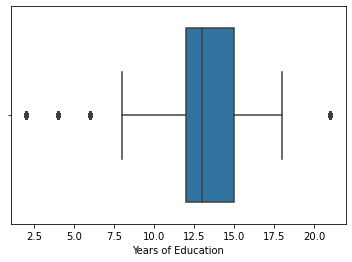

In [3]:
sns.boxplot(x='Years of Education', data = training)

<AxesSubplot:xlabel='Years of Education', ylabel='Marital Status'>

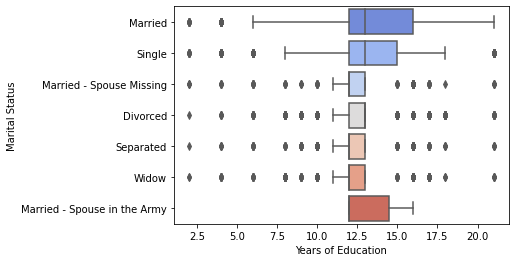

In [4]:
sns.boxplot(x= 'Years of Education', y='Marital Status', data=training, orient='h', palette='coolwarm') # dividido por marital status

<AxesSubplot:xlabel='Years of Education', ylabel='Role'>

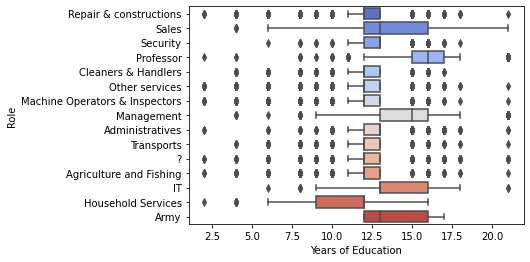

In [5]:
sns.boxplot(x= 'Years of Education', y='Role', data=training, orient='h', palette='coolwarm')

<AxesSubplot:xlabel='Working Hours per week'>

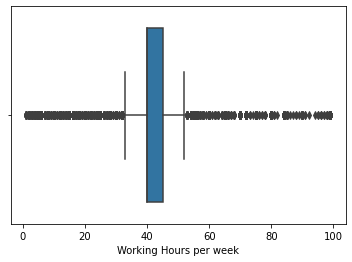

In [6]:
sns.boxplot(x='Working Hours per week', data = training)

In [7]:
# Ver o extremo máximo de cada variável numérica
iq = training.quantile(0.75) - training.quantile(0.25)
upper_max = training.quantile(0.75) +1.5*iq
upper_max

Years of Education        19.5
Working Hours per week    52.5
Money Received             0.0
Ticket Price               0.0
Income                     0.0
dtype: float64

In [8]:
# Ver o extremo mínimo de cada variável numérica
upper_min = training.quantile(0.25) -1.5*iq
upper_min 

Years of Education         7.5
Working Hours per week    32.5
Money Received             0.0
Ticket Price               0.0
Income                     0.0
dtype: float64

In [9]:
# Mínimos: procurar valores inferiores aos extremos
training[training['Years of Education'] < 7.5].count() # 392 obs = 1.75% das obs
training[training['Working Hours per week'] < 32.5].count() # 3783 obs = 16.89% das obs
training[training['Money Received'] < 0].count() # 0 obs = 0% das obs
training[training['Income'] < 0].count() # 0 obs = 0% das obs
training[training['Ticket Price'] < 0].count() # 0 obs = 0% das obs

Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

= 18.64% dos dados são outliers (antes do extremo inferior)

Excluindo Money Received e Ticket Price, que representam as categorias de quem paga ou quem recebe, uma vez que não são dados que se diferenciam drasticamente dos outros e excluindo Income uma vez que 0 é tanto extremo inferior como superior

In [10]:
# Máximos: procurar valores superiores aos extremos
training[training['Years of Education'] > 19.5].count() # 289 obs = 1.29% das obs
training[training['Working Hours per week'] > 52.5].count() # 2442 obs = 10.9% das obs
training[training['Money Received'] > 0].count() # 1832 obs = 8.17% das obs
training[training['Income'] > 0].count() # 5311 obs = 23.7% das obs
training[training['Ticket Price'] > 0].count() # 1057 obs = 4.7% das obs

Name                      1057
Birthday                  1057
Native Continent          1057
Marital Status            1057
Lives with                1057
Base Area                 1057
Education Level           1057
Years of Education        1057
Employment Sector         1057
Role                      1057
Working Hours per week    1057
Money Received            1057
Ticket Price              1057
Income                    1057
dtype: int64

= 12.19% dos dados são outliers (depois do extremo superior)

Excluindo Money Received e Ticket Price, que representam as categorias de quem paga ou quem recebe, uma vez que não são dados que se diferenciam drasticamente dos outros e excluindo Income uma vez que 0 é tanto extremo inferior como superior

### Check incoherence

In [11]:
print(training['Working Hours per week'].max())
print(training['Money Received'].min()) 
print(training['Ticket Price'].min()) 
print(training['Income'].value_counts()) 
print(training['Years of Education'].max()) 

99
0
0
0    17089
1     5311
Name: Income, dtype: int64
21


Não há Money Received nem Ticket Price negativos

O Income apenas toma os valores de 0 ou 1

### Check Missing Values

In [12]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 12486 to 34885
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    22400 non-null  object
 1   Birthday                22400 non-null  object
 2   Native Continent        22400 non-null  object
 3   Marital Status          22400 non-null  object
 4   Lives with              22400 non-null  object
 5   Base Area               22400 non-null  object
 6   Education Level         22400 non-null  object
 7   Years of Education      22400 non-null  int64 
 8   Employment Sector       22400 non-null  object
 9   Role                    22400 non-null  object
 10  Working Hours per week  22400 non-null  int64 
 11  Money Received          22400 non-null  int64 
 12  Ticket Price            22400 non-null  int64 
 13  Income                  22400 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


In [13]:
training['Employment Sector'].value_counts()
training['Native Continent'].value_counts()
training['Marital Status'].value_counts()
training['Lives with'].value_counts()
training['Base Area'].value_counts()
training['Education Level'].value_counts()
training['Years of Education'].value_counts()
training['Role'].value_counts()

Professor                         2849
Management                        2797
Repair & constructions            2795
Administratives                   2608
Sales                             2531
Other services                    2287
Machine Operators & Inspectors    1384
?                                 1271
Transports                        1071
Cleaners & Handlers                922
Agriculture and Fishing            702
IT                                 626
Security                           450
Household Services                 102
Army                                 5
Name: Role, dtype: int64

Não existem missing values. No entanto, existem várias colunas em que há a presença de um "?", que é assim considerado um missing value. As variáveis que contêm este missing value são então: Employment Sector, Base Area, Role

In [14]:
training.dtypes

Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

In [15]:
training.describe()

,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,13.173884,40.483795,1324.915357,109.145313,0.237098
std,2.512451,12.370921,9227.771813,500.208904,0.425313
min,2.000000,1.000000,0.000000,0.000000,0.000000
25%,12.000000,40.000000,0.000000,0.000000,0.000000
50%,13.000000,40.000000,0.000000,0.000000,0.000000
75%,15.000000,45.000000,0.000000,0.000000,0.000000
max,21.000000,99.000000,122999.000000,5358.000000,1.000000


### Visual Exploration

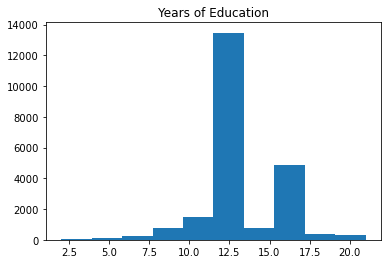

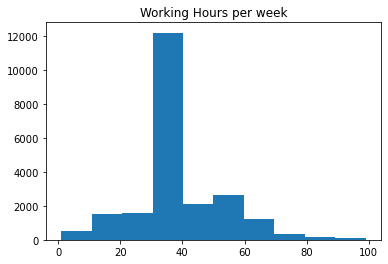

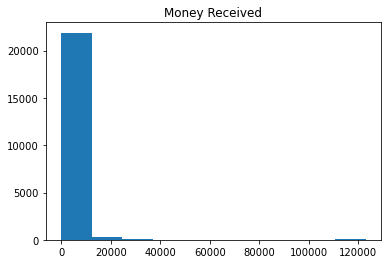

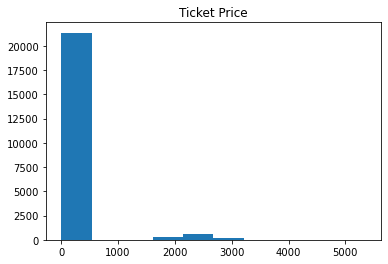

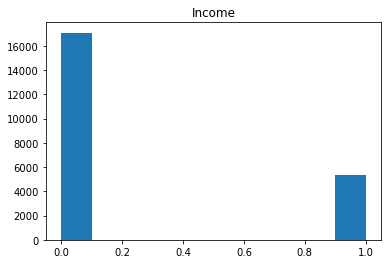

In [16]:
# criar dataframes de dados numéricos e dados categóricos para depois poder analisar as distribuições
numerical_df = training[['Years of Education','Working Hours per week','Money Received','Ticket Price', 'Income']]
categorical_df = training[['Name','Birthday','Native Continent','Marital Status','Lives with','Base Area', 'Education Level', 'Employment Sector',
                          'Role']]

for i in numerical_df.columns:
    plt.hist(numerical_df[i])
    plt.title(i)
    plt.show()

Aqui temos uma representação visual das distribuições das variáveis numéricas

<AxesSubplot:>

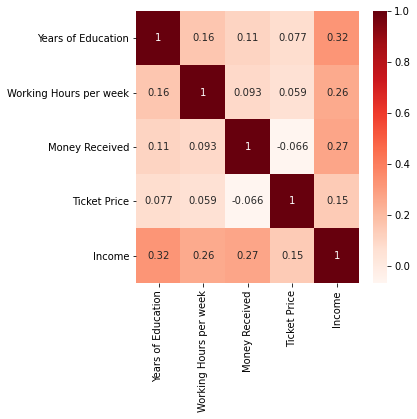

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(training.corr(method='spearman'), annot=True, cmap=plt.cm.Reds)

Aqui conseguimos ver o mapa de correlações Spearman entre as variáveis numéricas, em que a correlação com maior destaque é Income x Years of Education.

<AxesSubplot:>

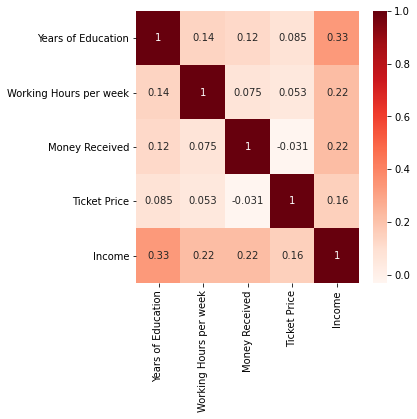

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(training.corr(method='pearson'), annot=True, cmap=plt.cm.Reds)

Aqui conseguimos ver o mapa de correlações Pearson entre as variáveis numéricas, em que a correlação com maior destaque é Income x Years of Education tal como nas correlações Spearman, desta vez com uma correlação de 0,33.

## Data Preparation

### Feature Engineering

In [19]:
training['Employment Sector'] = training['Employment Sector'].replace('?', training['Employment Sector'].value_counts().idxmax())
training['Employment Sector'] = training['Employment Sector'].replace(['Private Sector - Services ', 'Private Sector - Others'], ['Private Sector','Private Sector'])
training['Employment Sector'] = training['Employment Sector'].replace(['Public Sector - Others', 'Public Sector - Government'], ['Public Sector','Public Sector'])
training['Employment Sector'] = training['Employment Sector'].replace(['Self-Employed (Individual)', 'Self-Employed (Company)'], ['Self-Employed','Self-Employed'])
training['Employment Sector'] = training['Employment Sector'].replace(['Unemployed', 'Never Worked'], ['Unemployed', 'Unemployed'])

training['Employment Sector'].value_counts()

Private Sector    17743
Self-Employed      2527
Public Sector      2111
Unemployed           19
Name: Employment Sector, dtype: int64

Para tratar do missing value "?" nesta variável, decidimos substituir esses valores pela moda, sendo uma abordagem fácil e segura pois não tem muito impacto nas frequências. De resto, agrupamos todos os Private Sector, todos os Public Sector, todos os Self-Employed e todos os Unemployed, uma vez que ao estarem em classes separadas se pudessem tornar redondantes.

In [20]:
training['Base Area'] = training['Base Area'].replace('?', training['Base Area'].value_counts().idxmax())

training['Base Area'].value_counts()
training['Native Continent'].value_counts()

Europe     19111
Africa      2187
Asia         699
America      219
Oceania      184
Name: Native Continent, dtype: int64

In [21]:
training.replace(['Middle School - 2nd Cycle', 'Middle School Complete', 'Middle School - 1st Cycle', 'Primary School', 'Preschool'], ['Basic Education']*5, inplace = True)
training.replace(['Professional School', 'High School - 2nd Cycle','High School - 1st Cycle','High School Complete'], ['High School Education']*4, inplace = True)
training.replace(['High School + PostGraduation', 'Bachelors + PostGraduation','Masters','Professional School + PostGraduation', 'Bachelors', 'Masters + PostGraduation', 'PhD'], ['Superior Education']*7, inplace = True)

training['Education Level'].value_counts()

Superior Education       12257
High School Education     8977
Basic Education           1166
Name: Education Level, dtype: int64

À semelhança da possível redondância vista anteriormente, agrupamos os diferentes níveis de educação de forma a concentrar apenas 3 níveis: Basic Education, High School Education e Superior Education

In [22]:
training['Role'] = training['Role'].replace('?', 'Unknown')

training['Role'].value_counts()

Professor                         2849
Management                        2797
Repair & constructions            2795
Administratives                   2608
Sales                             2531
Other services                    2287
Machine Operators & Inspectors    1384
Unknown                           1271
Transports                        1071
Cleaners & Handlers                922
Agriculture and Fishing            702
IT                                 626
Security                           450
Household Services                 102
Army                                 5
Name: Role, dtype: int64

In [23]:
training['Marital Status'] = training['Marital Status'].replace(['Married - Spouse in the Army', 'Married - Spouse Missing'], ['Married','Married'])

training['Marital Status'].value_counts()

Married      10517
Single        7416
Divorced      3072
Separated      699
Widow          696
Name: Marital Status, dtype: int64

In [24]:
training['Lives with'] = training['Lives with'].replace(['Wife', 'Husband'], ['Partner','Partner'])
training['Lives with'] = training['Lives with'].replace(['Other Family', 'Other relatives'], ['Family','Family'])

training['Lives with'].value_counts()

Partner     10061
Family       6458
Children     3519
Alone        2362
Name: Lives with, dtype: int64

### Fix extreme outliers

In [25]:
training[training['Working Hours per week'] < 7].count() # apagar 183 inferiores a 7 e 149 superiores a 80

Name                      183
Birthday                  183
Native Continent          183
Marital Status            183
Lives with                183
Base Area                 183
Education Level           183
Years of Education        183
Employment Sector         183
Role                      183
Working Hours per week    183
Money Received            183
Ticket Price              183
Income                    183
dtype: int64

In [26]:
training[training['Working Hours per week'] > 80].count()

Name                      149
Birthday                  149
Native Continent          149
Marital Status            149
Lives with                149
Base Area                 149
Education Level           149
Years of Education        149
Employment Sector         149
Role                      149
Working Hours per week    149
Money Received            149
Ticket Price              149
Income                    149
dtype: int64

In [27]:
training[training['Years of Education'] < 5].count() # apagar 155 inferiores a 5

Name                      155
Birthday                  155
Native Continent          155
Marital Status            155
Lives with                155
Base Area                 155
Education Level           155
Years of Education        155
Employment Sector         155
Role                      155
Working Hours per week    155
Money Received            155
Ticket Price              155
Income                    155
dtype: int64

In [28]:
training.loc[training['Working Hours per week'] < 7,'Working Hours per week'] = np.nan
training.loc[training['Working Hours per week'] > 80,'Working Hours per week'] = np.nan

In [29]:
training.loc[training['Years of Education'] < 5,'Years of Education'] = np.nan

Substituimos os outliers extremos por missing values, de forma a conseguir aplicar técnicas de imputação de dados.

In [30]:
training.isnull().sum()
# 487 nulos - 2.17% dos dados

Name                        0
Birthday                    0
Native Continent            0
Marital Status              0
Lives with                  0
Base Area                   0
Education Level             0
Years of Education        155
Employment Sector           0
Role                        0
Working Hours per week    332
Money Received              0
Ticket Price                0
Income                      0
dtype: int64

### KNN Imputation

In [31]:
from sklearn.impute import KNNImputer
train_knn = training.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Years of Education'] = knn_imputer.fit_transform(train_knn[['Years of Education']])
train_knn['Working Hours per week'] = knn_imputer.fit_transform(train_knn[['Working Hours per week']])
train_knn.isnull().sum()

Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

In [32]:
train_knn = train_knn.round(0)

In [33]:
train_knn.head(195)

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
CITIZEN_ID,,,,,,,,,,,,,,
12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Partner,Northbury,Superior Education,13.0,Private Sector,Repair & constructions,40.0,0,2273,1
12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Partner,Northbury,High School Education,12.0,Public Sector,Repair & constructions,40.0,0,0,1
12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Partner,Northbury,High School Education,12.0,Private Sector,Sales,46.0,0,2321,1
12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Partner,Northbury,High School Education,11.0,Private Sector,Security,37.0,5395,0,1
12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Family,Northbury,Superior Education,21.0,Self-Employed,Professor,45.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,Mr. Cameron Lawrence,"September 17,2008",Europe,Married,Partner,Northbury,High School Education,12.0,Public Sector,Management,40.0,0,0,1
12677,Miss Lauren Duncan,"May 24,2024",Europe,Single,Children,Northbury,Superior Education,13.0,Private Sector,Cleaners & Handlers,30.0,0,0,0
12678,Mrs. Jessica Carr,"September 13,2008",Europe,Divorced,Alone,Northbury,Superior Education,13.0,Private Sector,Administratives,40.0,1124,0,0


In [34]:
training = train_knn

### Create new features

In [35]:
# criar variável age
training['Age'] = 2048 - training['Birthday'].apply(lambda x: int(str(x).split(",")[1])) 
training = training.drop("Birthday", axis=1)

# adicionar a variável age ao dataframe de variáveis numéricas
numerical_df.assign(Age = training['Age'])

,Years of Education,Working Hours per week,Money Received,Ticket Price,Income,Age
CITIZEN_ID,,,,,,
12486,13,40,0,2273,1,45
12487,12,40,0,0,1,42
12488,12,46,0,2321,1,39
12489,11,37,5395,0,1,63
12490,21,45,0,0,1,33
...,...,...,...,...,...,...
34881,12,40,0,0,0,25
34882,12,35,0,0,0,23
34883,17,40,2674,0,0,26


Criação da variável Age através da transformação da variável Birthday. Como o ano de referência da criação do modelo preditivo é 2048, assumimos esse como o ano para calcular a idade dos cidadãos.

In [36]:
(training['Years of Education'] > training['Age']).any()

False

Por questões de coerência dos dados, no código acima procuramos por observações em que Years of Education sejam superiores a Age. Como o resultado é Falso, confirmamos que não existe incoerência.

In [37]:
(training['Age'] < 0).any()

False

Por questões de coerência dos dados, no código acima procuramos por observações em que a variável Age seja inferior a 0. Como o resultado é Falso, confirmamos que não existe incoerência.

In [38]:
# criar variável gender

training['Gender'] = training.Name.apply(lambda x: x.split(' ')[0].strip())
training['Gender'].replace(['Miss', 'Mrs.', 'Mr.'], ['F','F','M'],inplace=True)
training = training.drop("Name", axis=1)

Criação da variável Gender através da extração dos títulos pessoais presentes na variável Name e consequente drop desta mesma variável, uma vez que o nome não é relevante para um modelo preditivo.

### Create dummy variables

In [39]:
dummy = pd.get_dummies(training, drop_first = True)
dummy.head(9)

,Years of Education,Working Hours per week,Money Received,Ticket Price,Income,Age,Native Continent_America,Native Continent_Asia,Native Continent_Europe,Native Continent_Oceania,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Role_Transports,Role_Unknown,Gender_M
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
12486,13.0,40.0,0,2273,1,45,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
12487,12.0,40.0,0,0,1,42,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
12488,12.0,46.0,0,2321,1,39,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
12489,11.0,37.0,5395,0,1,63,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
12490,21.0,45.0,0,0,1,33,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
12491,15.0,30.0,0,0,0,24,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12492,12.0,40.0,6369,0,1,36,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
12493,11.0,40.0,0,0,0,37,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
12494,13.0,40.0,0,0,0,24,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


### Scale Data

In [40]:
from sklearn.preprocessing import MinMaxScaler

finalData = dummy.copy()

minmax_scaler = MinMaxScaler()

In [41]:
scale = minmax_scaler.fit(finalData)

In [42]:
minmax_data = scale.transform(finalData)

In [43]:
minmax_data = pd.DataFrame(minmax_data, columns = finalData.columns, index=dummy.index)
minmax_data.head(10)

,Years of Education,Working Hours per week,Money Received,Ticket Price,Income,Age,Native Continent_America,Native Continent_Asia,Native Continent_Europe,Native Continent_Oceania,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Role_Transports,Role_Unknown,Gender_M
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
12486,0.466667,0.452055,0.000000,0.424225,1.0,0.383562,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12487,0.400000,0.452055,0.000000,0.000000,1.0,0.342466,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12488,0.400000,0.534247,0.000000,0.433184,1.0,0.301370,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12489,0.333333,0.410959,0.043862,0.000000,1.0,0.630137,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12490,1.000000,0.520548,0.000000,0.000000,1.0,0.219178,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12491,0.600000,0.315068,0.000000,0.000000,0.0,0.095890,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12492,0.400000,0.452055,0.051781,0.000000,1.0,0.260274,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12493,0.333333,0.452055,0.000000,0.000000,0.0,0.273973,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12494,0.466667,0.452055,0.000000,0.000000,0.0,0.095890,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

### Chi-Square - Important predictors (before dummies and without name+birthday)

In [44]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)
        
        
df = training.copy()


#Initialize ChiSquare Class
cT = ChiSquare(df)


#Feature Selection
testColumns = ['Native Continent','Marital Status','Lives with','Base Area','Education Level', 'Years of Education','Employment Sector','Role', 'Working Hours per week','Money Received']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Income" ) 

Native Continent is IMPORTANT for Prediction
Marital Status is IMPORTANT for Prediction
Lives with is IMPORTANT for Prediction
Base Area is IMPORTANT for Prediction
Education Level is IMPORTANT for Prediction
Years of Education is IMPORTANT for Prediction
Employment Sector is IMPORTANT for Prediction
Role is IMPORTANT for Prediction
Working Hours per week is IMPORTANT for Prediction
Money Received is IMPORTANT for Prediction


### Chi-Square - Important predictors (after dummies)

In [45]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)
        
        
df = minmax_data.copy()


#Initialize ChiSquare Class
cT = ChiSquare(df)


#Feature Selection
testColumns = minmax_data.columns
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Income" ) 

Years of Education is IMPORTANT for Prediction
Working Hours per week is IMPORTANT for Prediction
Money Received is IMPORTANT for Prediction
Ticket Price is IMPORTANT for Prediction
Income is IMPORTANT for Prediction
Age is IMPORTANT for Prediction
Native Continent_America is IMPORTANT for Prediction
Native Continent_Asia is NOT an important predictor. (Discard Native Continent_Asia from model)
Native Continent_Europe is IMPORTANT for Prediction
Native Continent_Oceania is IMPORTANT for Prediction
Marital Status_Married is IMPORTANT for Prediction
Marital Status_Separated is IMPORTANT for Prediction
Marital Status_Single is IMPORTANT for Prediction
Marital Status_Widow is IMPORTANT for Prediction
Lives with_Children is IMPORTANT for Prediction
Lives with_Family is IMPORTANT for Prediction
Lives with_Partner is IMPORTANT for Prediction
Base Area_Aerilon is NOT an important predictor. (Discard Base Area_Aerilon from model)
Base Area_Alverton is IMPORTANT for Prediction
Base Area_Aroonshi

#### Drop not important variables (Chi2)

In [46]:
reduced_d = minmax_data.copy()
reduced_data = reduced_d.drop(["Native Continent_Asia", "Base Area_Aerilon", "Base Area_Aroonshire", "Base Area_Bellenau", "Base Area_Butterpond", "Base Area_Carlisle", "Base Area_Conriston", "Base Area_Drumchapel", "Base Area_Fool's March", "Base Area_Ironforge", "Base Area_Kirkwall", "Base Area_Lewes", "Base Area_Marnmouth", "Base Area_Mensfield", "Base Area_Middlesbrough","Base Area_MillerVille", 'Base Area_Orilon', "Base Area_Redwick Bush", "Base Area_Sharpton", "Base Area_Tranmere", "Base Area_Watford", "Base Area_Wigston", "Base Area_Willesden", "Base Area_Woodpine","Role_Army"], axis=1)
reduced_data.head() #dropped 24 variables

,Years of Education,Working Hours per week,Money Received,Ticket Price,Income,Age,Native Continent_America,Native Continent_Europe,Native Continent_Oceania,Marital Status_Married,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Role_Transports,Role_Unknown,Gender_M
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
12486,0.466667,0.452055,0.000000,0.424225,1.0,0.383562,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12487,0.400000,0.452055,0.000000,0.000000,1.0,0.342466,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12488,0.400000,0.534247,0.000000,0.433184,1.0,0.301370,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12489,0.333333,0.410959,0.043862,0.000000,1.0,0.630137,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12490,1.000000,0.520548,0.000000,0.000000,1.0,0.219178,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Como estas 24 variáveis se revelaram como não sendo importantes para o modelo preditivo através do Chi-Quadrado, acabamos por dar drop nelas.

### RFE
#### Data Partition
Esta partição é apenas feita para podermos aplicar o Recursive Feature Elimination. Não é a mesma partição que é feita para testar os modelos.

In [47]:
#indep = minmax_data.drop('Income', axis = 1)
#target = minmax_data['Income']

In [48]:
#from sklearn.model_selection import train_test_split

#X_train_val, X_test, y_train_val, y_test = train_test_split(indep, 
#                                                    target, 
#                                                   test_size=0.2, 
#                                                    random_state=15, 
#                                                    shuffle=True, 
#                                                    stratify=target
#                                                   )

In [49]:
#X_train, X_val, y_train, y_val = train_test_split(X_train_val,
#                                                  y_train_val,
#                                                  test_size = 0.25,
#                                                  random_state = 15,
#                                                  shuffle=True,
#                                                  stratify=y_train_val
#)

In [50]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE
#model = LogisticRegression(max_iter=500)

In [51]:
#rfe = RFE(estimator = model, n_features_to_select = 1) #correr primeiro com 1, depois correr de novo com o nº otimo de variaveis que resulta do for loop

In [52]:
#X_rfe = rfe.fit_transform(X = indep, y = target)

In [53]:
#nof_list=np.arange(1,74) # Number of features
#high_score=0 # Variable to store the optimum features
#nof=0           
#score_list =[]
#for n in range(len(nof_list)):
#    model = LogisticRegression(max_iter=500)
#    rfe = RFE(model,nof_list[n])
#    X_train_rfe = rfe.fit_transform(indep,target)
#    X_val_rfe = rfe.transform(X_test)
#    model.fit(X_train_rfe,target)
    
#    score = model.score(X_val_rfe,y_test)
#    score_list.append(score)
    
#    if(score>high_score):
#        high_score = score
#        nof = nof_list[n]
#print("Optimum number of features: %d" %nof)
#print("Score with %d features: %f" % (nof, high_score))

In [54]:
#selected_features = pd.Series(rfe.support_, index = indep.columns)
#selected_features.loc[selected_features == False] # TRUE: manter FALSE: sair

#### Drop not important variables (RFE)

In [55]:
#reduced_d = minmax_data.copy()
#reduced_data = reduced_d.drop(["Native Continent_Asia", "Native Continent_Europe", "Marital Status_Separated", "Marital Status_Widow", "Lives with_Family", "Base Area_Aerilon", "Base Area_Auchenshuggle", "Base Area_Bellenau", "Base Area_Carlisle", "Base Area_Conriston", "Base Area_Drumchapel", "Base Area_Fool's March", "Base Area_Ironforge", "Base Area_King's Watch", "Base Area_Knife's Edge", "Base Area_Laenteglos", "Base Area_Lanercost", "Base Area_Lewes", "Base Area_Marnmouth", "Base Area_MillerVille", "Base Area_Redwick Bush", "Base Area_Sharnwick", "Base Area_Tranmere", "Base Area_Woodpine", "Education Level_High School Education", "Education Level_Superior Education", "Employment Sector_Public Sector", "Employment Sector_Self-Employed", "Role_Army", "Role_Repair & constructions", "Role_Sales", "Role_Security", "Role_Transports", "Gender_M"], axis=1)
#reduced_data.head()

## Data Partition

In [56]:
indep = reduced_data.drop('Income', axis = 1)
target = reduced_data['Income']

In [57]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(indep, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target
                                                   )

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size = 0.25,
                                                  random_state = 15,
                                                  shuffle=True,
                                                  stratify=y_train_val
)

In [59]:
print('train:{}% | validation:{}% | test:{}%'.format(round(len(y_train)/len(target),2),
                                                     round(len(y_val)/len(target),2),
                                                     round(len(y_test)/len(target),2)
                                                    ))

train:0.6% | validation:0.2% | test:0.2%


Aqui repartimos em 3 datasets, onde no Training temos 60% dos dados de forma a conseguirmos recolher comportamentos para construir o modelo, no Validation temos 20% dos dados de forma a permitir melhorias no modelo e explorar se o modelo está a fazer overfitting (comportar-se notoriamente melhor no dataset Training), e no Test temos 20% dos dados que nos irão permitir avaliar a performance do modelo final

## ---------------------------------------------------------------------------------------------------------------------------------

## Performance Measures

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)

In [61]:
y_pred = lr.predict(X_val)
y_pred

array([ 0.25820965, -0.01459343,  0.21334907, ..., -0.01808563,
        0.48223107,  0.07696275])

#### R^2

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

In [63]:
r2_score(y_val, y_pred)

0.3341631667499575

#### Adjusted R^2

In [64]:
r2 = r2_score(y_val, y_pred)
n = len(y_val)
p = len(X_train.columns)

def adj_r2 (r2,n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

adj_r2(r2,n,p)

0.3267983801067855

#### Mean Absolute Error

In [65]:
mean_absolute_error(y_val, y_pred)

0.2703543530216204

#### Root Mean Squared Error

In [66]:
mean_squared_error(y_val, y_pred, squared = True)

0.12042270081332015

#### Median Absolute Error

In [67]:
median_absolute_error(y_val, y_pred)

0.2351370391716175

## Classification Problems

### Logistic Regression

In [68]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [69]:
#log_model = LogisticRegression()

In [70]:
#log_model.fit(X_train, y_train)

In [71]:
#y_pred = log_model.predict(X_val)
#y_pred

In [72]:
#f1_score(y_val, y_pred)

### Bayesian Classifiers

In [73]:
#from sklearn.naive_bayes import GaussianNB

In [74]:
#model_bayes = GaussianNB().fit(X_train, y_train)

In [75]:
#labels_train_bayes = model_bayes.predict(X_train)
#labels_val_bayes = model_bayes.predict(X_val)

In [76]:
#model_bayes.predict_proba(X_val)

In [77]:
#from sklearn.metrics import f1_score

#print('Train:', f1_score(y_train, labels_train_bayes))
#print('Validation:', f1_score(y_val, labels_val_bayes))

### KNN

In [78]:
#from sklearn.neighbors import KNeighborsClassifier

In [79]:
#model_knn = KNeighborsClassifier().fit(X_train, y_train)

In [80]:
#labels_train_knn = model_knn.predict(X_train)
#labels_val_knn = model_knn.predict(X_val)

In [81]:
#model_knn.predict_proba(X_val)

In [82]:
#print('Train:', f1_score(y_train, labels_train_knn))
#print('Validation:', f1_score(y_val, labels_val_knn))

#### - Changing number of neighbours

In [83]:
#model_knn_k1 = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

#labels_train_knn_k1 = model_knn_k1.predict(X_train)
#labels_val_knn_k1 = model_knn_k1.predict(X_val)

#print("For a KNN with 1 neighbor, the f1_score for train is " + str(f1_score(y_train, labels_train_knn_k1)) + 
#      " and for validation is " + str(f1_score(y_val, labels_val_knn_k1)))

In [84]:

#import numpy as np
#numberK_list=np.arange(1,20)
#high_f1score=0
#nof=0           
#score_list_train =[]
#score_list_val =[]
#for n in numberK_list:
#    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
#    labels_train_knn = model.predict(X_train)
#    labels_val_knn = model.predict(X_val)
    
#    score_train = f1_score(y_train, labels_train_knn)
#    score_val = f1_score(y_val, labels_val_knn)
#    score_list_train.append(score_train)
#    score_list_val.append(score_val)
    
#    if(score_val>high_f1score):
#        high_f1score = score_val
#        nof = numberK_list[n]
#print("Best number of neighbors: %d" %nof)
#print("F1 Score in validation with %d neighbors: %f" % (nof, high_f1score)) 

In [85]:
#model_knn_distance = KNeighborsClassifier(n_neighbors=10, weights = 'distance').fit(X_train, y_train)

#labels_train_knn_distance = model_knn_distance.predict(X_train)
#labels_val_knn_distance = model_knn_distance.predict(X_val)
#print("For a KNN with 10 neighbors and using weights = 'distance', the f1_score for train is " + str(f1_score(y_train, labels_train_knn_distance)) + 
#      " and for validation is " + str(f1_score(y_val, labels_val_knn_distance)))

In [86]:
#model_knn_manhattan = KNeighborsClassifier(n_neighbors=10, metric = 'manhattan').fit(X_train, y_train)

#labels_train_knn_manhattan = model_knn_manhattan.predict(X_train)
#labels_val_knn_manhattan = model_knn_manhattan.predict(X_val)
#print("For a KNN with 10 neighbors, and using the manhattan distance, the f1_score for train is " + str(f1_score(y_train, labels_train_knn_manhattan)) + 
#      " and for validation is " + str(f1_score(y_val, labels_val_knn_manhattan)))

In [87]:
#model_knn_hamming = KNeighborsClassifier(n_neighbors=10, metric = 'hamming').fit(X_train, y_train)

#labels_train_knn_hamming = model_knn_hamming.predict(X_train)
#labels_val_knn_hamming = model_knn_hamming.predict(X_val)
#print("For a KNN with 10 neighbors, and using the hamming distance, the f1_score for train is " + str(f1_score(y_train, labels_train_knn_hamming)) + 
#      " and for validation is " + str(f1_score(y_val, labels_val_knn_hamming)))

In [88]:
#model_knn_minkowski = KNeighborsClassifier(n_neighbors=8, metric = 'minkowski').fit(X_train, y_train)

#labels_train_knn_minkowski = model_knn_minkowski.predict(X_train)
#labels_val_knn_minkowski = model_knn_minkowski.predict(X_val)
#print("For a KNN with 10 neighbors, and using the minkowski distance, the f1_score for train is " + str(f1_score(y_train, labels_train_knn_minkowski)) + 
#      " and for validation is " + str(f1_score(y_val, labels_val_knn_minkowski)))

### Decision Tree

In [89]:
#from sklearn.tree import DecisionTreeClassifier
#modelDT = DecisionTreeClassifier()

In [90]:
#modelDT.fit(X_train, y_train)

In [91]:
#from sklearn import tree
#from sklearn.tree import export_graphviz
#import graphviz
#import pydotplus

In [92]:
#y_pred = modelDT.predict(X_val)

In [93]:
#print('The defined three has a depth of ' + str(modelDT.get_depth()) + ', ' + str(modelDT.tree_.node_count) + 
#      ' nodes and a total of ' + str(modelDT.get_n_leaves()) + ' leaves.')

In [94]:
#modelDT.predict_proba(X_val)

In [95]:
#modelDT.score(X_train, y_train)

In [96]:
#modelDT.score(X_val, y_val)

In [97]:
#f1_score(modelDT.predict(X_train),y_train)

In [98]:
#f1_score(modelDT.predict(X_val),y_val)

In [99]:
#modelDT.feature_importances_

In [100]:
#import numpy as np
#import matplotlib.pyplot as plt
#def plot_feature_importances(model):
#    n_features = X_train.shape[1]
#    plt.figure(figsize=(50,30))
#    plt.barh(range(n_features), model.feature_importances_, align='center')
#    plt.yticks(np.arange(n_features), X_train.columns)
#    plt.xlabel("Feature importance")
#    plt.ylabel("Feature")
#    plt.show()

In [101]:
#plot_feature_importances(modelDT)

In [102]:
#modelDT_entropy = DecisionTreeClassifier(criterion='entropy')

In [103]:
#modelDT_entropy.fit(X_train, y_train)

In [104]:
#modelDT_entropy.score(X_val, y_val)

#### - Change tree's depth

In [105]:
#modelDT_maxdepth3 = DecisionTreeClassifier(max_depth=5)

In [106]:
#modelDT_maxdepth3.fit(X_train, y_train)

In [107]:
#modelDT_maxdepth3.score(X_val, y_val)

In [108]:
#modelDT_maxdepth3.score(X_train, y_train)

In [109]:
#modelDT_maxdepth3.predict_proba(X_val)

In [110]:
#f1_score(modelDT_maxdepth3.predict(X_train),y_train)

In [111]:
#f1_score(modelDT_maxdepth3.predict(X_val),y_val)

#### - Change number of leaf nodes

In [112]:
#modelDT_leafs8 = DecisionTreeClassifier(max_leaf_nodes=8)

In [113]:
#modelDT_leafs8.fit(X_train, y_train)

In [114]:
#modelDT_leafs8.score(X_val, y_val)

In [115]:
#modelDT_leafs8.score(X_train, y_train)

In [116]:
#f1_score(modelDT_leafs8.predict(X_train),y_train)

In [117]:
#f1_score(modelDT_leafs8.predict(X_val),y_val)

## Gradient Boosting

In [118]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

In [119]:
# GB Default - Without parameter tuning
gb_clf2 = GradientBoostingClassifier()
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_val)
gb_clf2.score(X_val, y_val)

0.8611607142857143

In [120]:
f1_score(y_val, y_pred)

0.667379679144385

#### Parameter Tuning

In [121]:
# Tuning learning_rate
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.851
Accuracy score (validation): 0.842
Learning rate:  0.075
Accuracy score (training): 0.859
Accuracy score (validation): 0.846
Learning rate:  0.1
Accuracy score (training): 0.861
Accuracy score (validation): 0.850
Learning rate:  0.25
Accuracy score (training): 0.864
Accuracy score (validation): 0.852
Learning rate:  0.5
Accuracy score (training): 0.868
Accuracy score (validation): 0.855
Learning rate:  0.75
Accuracy score (training): 0.871
Accuracy score (validation): 0.858
Learning rate:  1
Accuracy score (training): 0.873
Accuracy score (validation): 0.852


learning_Rate: shrinks the contribution of each tree

Podemos ver que o learning rate mais satisfatório é o de 0.75, uma vez que permite uma boa precisão tanto no modelo training como no de validação, sem overfit.

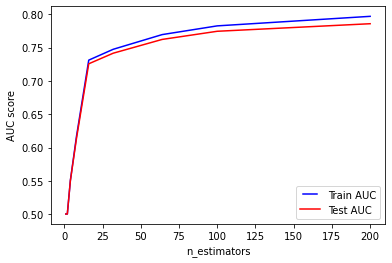

In [122]:
# Tuning n_estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

n_estimators: the number of boosting stages to perform (number of trees). Usually, the higher the number of trees, the better to learn the data

Conseguimos ver que à medida que o número de estimadores aumenta, não existe overfit. O valor ótimo será um valor grande, como 200, que revela fazer uma boa modelação dos dados.

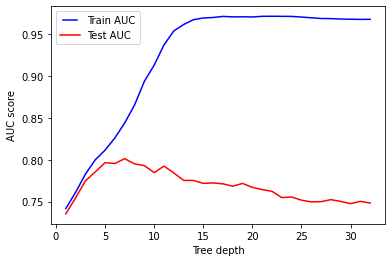

In [123]:
# Tuning max_depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

max_depth: limits the number of nodes in the tree and indicates how deep the built tree can be

Podemos ver que quanto maior o tree depth, mais o nosso modelo falha em prever novos valores. Ou seja, modela bastante bem a training data, o que não é o caso com a test data, resultando num overfit com grandes valores de tree depth. O valor ótimo aqui será um valor entre 2-5.

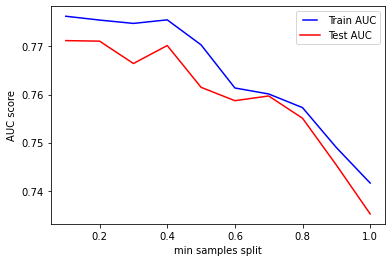

In [124]:
# Tuning min_samples_split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

min_samples_split: minimum number of samples required to split an internal node. A higher value means that the tree becomes more constrained

À medida que o modelo requer um maior número mínimo de amostras, vai obtendo menores valores da precisão ao modelar a training data e a test data. Aqui podemos optar por um min_samples_split igual a 0.4 para tentar manter a precisão elevada.

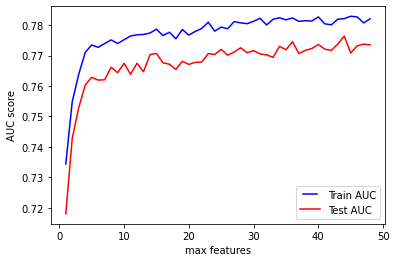

In [125]:
# Tuning max_features
max_features = list(range(1,indep.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

max_features: represents the number of features to consider when looking for the best split

Podemos ver que a performance tende a melhorar com incremento de max_features. Quantas mais variáveis incluirmos, melhor será a performance logo. No entanto, existe uma regra que se pode aplicar, em que o número máximo de features é a raíz quadrada do número de features do dataframe. Seguindo a regra, o valor ótimo será igual a 7. Podemos também utilizar max_features='sqrt'.

In [126]:
gb_clf2 = GradientBoostingClassifier(learning_rate=0.75, n_estimators=200, max_features='sqrt', max_depth=3, random_state=0, min_samples_split=0.4)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_val)

#### Confusion Matrix

confusion_matrix(y_val, y_pred)

The confusion matrix in sklearn is presented in the following format: <br>
[ [ TN  FP  ] <br>
    [ FN  TP ] ]

#### Accuracy Score

In [127]:
accuracy_score(y_val, y_pred)

0.8616071428571429

#### Precision Score

In [128]:
precision_score(y_val, y_pred)

0.7433920704845814

#### Recall Score

In [129]:
recall_score(y_val, y_pred)

0.635593220338983

#### F1 Score

In [130]:
f1_score(y_val, y_pred)

0.6852791878172588

#### Classification Report

In [132]:
from sklearn.metrics import classification_report

def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

labels_train = gb_clf2.predict(X_train)
labels_val = gb_clf2.predict(X_val)

metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     10253
         1.0       0.78      0.67      0.72      3187

    accuracy                           0.88     13440
   macro avg       0.84      0.80      0.82     13440
weighted avg       0.87      0.88      0.87     13440

[[9667  586]
 [1065 2122]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

## Neural Networks

In [ ]:
#from sklearn.model_selection import train_test_split
#import time
#import warnings
#warnings.filterwarnings('ignore')

#def avg_score(model):
#    score_train = []
#    score_val = []
#    timer = []
    
#    for i in range(10):
#        X_train, X_val, y_train, y_val = train_test_split(indep, target, train_size = 0.8, 
#                                                      shuffle = True, stratify = target)
#        begin = time.perf_counter() # start counting time
#        model.fit(X_train, y_train) # fit your model to your training data
#        end = time.perf_counter() # stop counting time
        
#        value_train = model.score(X_train, y_train) # mean accuracy for train
#        value_val = model.score(X_val, y_val) # mean accuracy for validation
#        score_train.append(value_train) # append the mean accuracy in train to your list score_train
#        score_val.append(value_val) # append the mean accuracy in validation to your list score_val
#        timer.append(end-begin) # append the time to your list timer
    
#    avg_time = round(np.mean(timer),3) # check the mean value of training time for your 10 models 
#    avg_train = round(np.mean(score_train),3) # check the mean accuracy in train for your 10 models
#    avg_val = round(np.mean(score_val),3) # check the mean accuracy in validation for your 10 models
#    std_time = round(np.std(timer),2) # check the standard deviation of training time for your 10 models
#    std_train = round(np.std(score_train),2) # check the standard deviation of the mean accuracy in train for your 10 models
#   std_val = round(np.std(score_val),2) # check the standard deviation of the mean accuracy in validation for your 10 models
    
#    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
#str(avg_val) + '+/-' + str(std_val)

In [ ]:
#def show_results(df, *args):
#    """
#    Receive an empty dataframe and the different models and call the function avg_score
#    """
#    count = 0
    # for each model passed as argument
#    for arg in args:
        # obtain the results provided by avg_score
#        time, avg_train, avg_val = avg_score(arg)
        # store the results in the right row
#        df.iloc[count] = time, avg_train, avg_val
#        count+=1
#    return df

In [ ]:
#from sklearn.neural_network import MLPClassifier
#model = MLPClassifier()

In [ ]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Raw'])
#show_results(df, model)

#### Hidden layer size

In [ ]:
#model_simple = MLPClassifier(hidden_layer_sizes=(1))

In [ ]:
#model_medium = MLPClassifier(hidden_layer_sizes=(10,10))

In [ ]:
#model_complex = MLPClassifier(hidden_layer_sizes=(100,100,100,100))

In [ ]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Simple','Medium','Complex'])
#show_results(df, model_simple, model_medium, model_complex)

#### The activation function

In [ ]:
#model_logistic = MLPClassifier(activation = 'logistic')

In [ ]:
#model_tanh = MLPClassifier(activation = 'tanh')

In [ ]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['logistic','tanh'])
#show_results(df, model_logistic, model_tanh)

#### The Solver

In [ ]:
#model_sgd = MLPClassifier(solver = 'sgd')

In [ ]:
#model_adam = MLPClassifier(solver = 'adam')

In [ ]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['sgd','adam'])
#show_results(df, model_sgd, model_adam)

#### The learning rate

In [ ]:
#model_constant = MLPClassifier(solver = 'sgd', learning_rate = 'constant')

In [ ]:
#model_invscaling = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling')

In [ ]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['constant','invscaling'])
#show_results(df, model_constant, model_invscaling)

####  The learning rate initialization

In [ ]:
#model_lr_big = MLPClassifier(learning_rate_init = 0.5)

In [ ]:
#model_lr_medium = MLPClassifier(learning_rate_init = 0.001)

In [ ]:
#model_lr_small = MLPClassifier(learning_rate_init = 0.000001)

In [ ]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['big','medium','small'])
#show_results(df, model_lr_big, model_lr_medium, model_lr_small)

#### Grid Search

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
#parameter_space = {
#    'hidden_layer_sizes': [(10), (10,10), (20,20)],
#    'activation': ['tanh', 'logistic'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate_init': [0.00001, 0.0001, 0.001, 0.01, 0.1],
#    'learning_rate': ['constant','invscaling']
#}

In [ ]:
#clf = GridSearchCV(model, parameter_space)

In [ ]:
#clf.fit(indep, target) 

In [ ]:
#clf.best_params_

In [ ]:
#final_model = clf.best_estimator_

In [ ]:
#df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['final_model'])
#show_results(df, final_model)

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(indep, target, 
#                                                  train_size = 0.8, shuffle = True, 
#                                                  stratify = target, random_state = 20)

In [ ]:
#final_model.fit(X_train, y_train)

In [ ]:
#print(final_model.predict(X_val))

In [ ]:
#final_model.score(X_train, y_train)

In [ ]:
#final_model.score(X_val, y_val)

## Random Forest

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier()
#rfc.fit(X_train, y_train)
#pred_rfc = rfc.predict(X_test)

In [ ]:
#from sklearn.metrics import confusion_matrix, classification_report
#print(classification_report(y_test, pred_rfc))

In [ ]:
#print(confusion_matrix(y_test, pred_rfc))

In [ ]:
#f1_score(rfc.predict(X_val),y_val)

## Support Vector Machine

In [ ]:
#from sklearn.svm import SVC
#svc = SVC()
#svc.fit(X_train, y_train)
#pred_svc = svc.predict(X_test)
#print(classification_report(y_test, pred_svc))

In [ ]:
#f1_score(svc.predict(X_val),y_val)

## Deploy

In [133]:
test = pd.read_csv('Test.csv')
test.head(2)

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0


In [134]:
test.set_index('CITIZEN_ID', inplace = True)
test.head(10)

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
CITIZEN_ID,,,,,,,,,,,,,
34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0
34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0
34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827
34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0
34891,Mr. Jack Johnston,"June 21,2028",Europe,Single,Other Family,Northbury,Professional School,12,Private Sector - Services,Machine Operators & Inspectors,40,0,0
34892,Mrs. Joan Bond,"July 10,2012",Europe,Married,Husband,Northbury,Masters,17,Private Sector - Services,Professor,44,0,2432
34893,Miss Joanne Ogden,"May 31,2022",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Management,50,0,0
34894,Miss Carol Newman,"March 8,2013",Africa,Single,Other Family,Northbury,High School + PostGraduation,13,Private Sector - Services,Machine Operators & Inspectors,30,0,0


In [135]:
test['Employment Sector'] = test['Employment Sector'].replace('?', test['Employment Sector'].value_counts().idxmax())
test['Employment Sector'] = test['Employment Sector'].replace(['Private Sector - Services ', 'Private Sector - Others'], ['Private Sector','Private Sector'])
test['Employment Sector'] = test['Employment Sector'].replace(['Private Sector - Services ', 'Private Sector - Others'], ['Private Sector','Private Sector'])
test['Employment Sector'] = test['Employment Sector'].replace(['Public Sector - Others', 'Public Sector - Government'], ['Public Sector','Public Sector'])
test['Employment Sector'] = test['Employment Sector'].replace(['Self-Employed (Individual)', 'Self-Employed (Company)'], ['Self-Employed','Self-Employed'])
test['Employment Sector'] = test['Employment Sector'].replace(['Unemployed', 'Never Worked'], ['Unemployed', 'Unemployed'])

test['Employment Sector'].value_counts()

Private Sector    8039
Self-Employed     1121
Public Sector      938
Unemployed           2
Name: Employment Sector, dtype: int64

In [136]:
test['Base Area'] = test['Base Area'].replace('?', test['Base Area'].value_counts().idxmax())

test['Base Area'].value_counts()
test['Native Continent'].value_counts()

Europe     8651
Africa      930
Asia        340
America      92
Oceania      87
Name: Native Continent, dtype: int64

In [137]:
test.replace(['Middle School - 2nd Cycle', 'Middle School Complete', 'Middle School - 1st Cycle', 'Primary School', 'Preschool'], ['Basic Education']*5, inplace = True)
test.replace(['Professional School', 'High School - 2nd Cycle','High School - 1st Cycle','High School Complete'], ['High School Education']*4, inplace = True)
test.replace(['High School + PostGraduation', 'Bachelors + PostGraduation','Masters','Professional School + PostGraduation', 'Bachelors', 'Masters + PostGraduation', 'PhD'], ['Superior Education']*7, inplace = True)

test['Education Level'].value_counts()

Superior Education       5518
High School Education    4040
Basic Education           542
Name: Education Level, dtype: int64

In [138]:
test['Role'] = test['Role'].replace('?', 'Unknown')

test['Role'].value_counts()

Repair & constructions            1292
Professor                         1288
Management                        1257
Administratives                   1160
Sales                             1110
Other services                    1001
Machine Operators & Inspectors     616
Unknown                            570
Transports                         523
Cleaners & Handlers                446
IT                                 299
Agriculture and Fishing            290
Security                           197
Household Services                  47
Army                                 4
Name: Role, dtype: int64

In [139]:
test['Marital Status'] = test['Marital Status'].replace(['Married - Spouse in the Army', 'Married - Spouse Missing'], ['Married','Married'])

test['Marital Status'].value_counts()

Married      4872
Single       3249
Divorced     1359
Separated     325
Widow         295
Name: Marital Status, dtype: int64

In [140]:
test['Lives with'] = test['Lives with'].replace(['Wife', 'Husband'], ['Partner','Partner'])
test['Lives with'] = test['Lives with'].replace(['Other Family', 'Other relatives'], ['Family','Family'])

test['Lives with'].value_counts()

Partner     4674
Family      2809
Children    1540
Alone       1077
Name: Lives with, dtype: int64

In [141]:
test.loc[test['Working Hours per week'] < 7,'Working Hours per week'] = np.nan
test.loc[test['Working Hours per week'] > 80,'Working Hours per week'] = np.nan
test.loc[test['Years of Education'] < 5,'Years of Education'] = np.nan

In [142]:
from sklearn.impute import KNNImputer
train_knn = test.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Years of Education'] = knn_imputer.fit_transform(train_knn[['Years of Education']])
train_knn['Working Hours per week'] = knn_imputer.fit_transform(train_knn[['Working Hours per week']])
train_knn.isnull().sum()

Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
dtype: int64

In [143]:
test = train_knn

In [144]:
numerical_df = test[['Years of Education','Working Hours per week','Money Received','Ticket Price']]
categorical_df = test[['Name','Birthday','Native Continent','Marital Status','Lives with','Base Area', 'Education Level', 'Employment Sector',
                          'Role']]
# criar variável age
test['Age'] = 2048 - test['Birthday'].apply(lambda x: int(str(x).split(",")[1])) 
test = test.drop("Birthday", axis=1)

# adicionar a variável age ao dataframe de variáveis numéricas
numerical_df.assign(Age = test['Age'])

,Years of Education,Working Hours per week,Money Received,Ticket Price,Age
CITIZEN_ID,,,,,
34886,16.0,40.0,0,0,36
34887,16.0,36.0,0,0,34
34888,13.0,50.0,12940,0,28
34889,12.0,48.0,0,1827,32
34890,15.0,45.0,0,0,37
...,...,...,...,...,...
44981,17.0,60.0,0,2432,36
44982,17.0,50.0,122999,0,48
44983,13.0,15.0,0,0,26


In [145]:
# criar variável gender

test['Gender'] = test.Name.apply(lambda x: x.split(' ')[0].strip())
test['Gender'].replace(['Miss', 'Mrs.', 'Mr.'], ['F','F','M'],inplace=True)
test = test.drop("Name", axis=1)

In [146]:
dummy_t = pd.get_dummies(test, drop_first = True)
dummy_t.head(9)

,Years of Education,Working Hours per week,Money Received,Ticket Price,Age,Native Continent_America,Native Continent_Asia,Native Continent_Europe,Native Continent_Oceania,Marital Status_Married,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Role_Transports,Role_Unknown,Gender_M
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
34886,16.0,40.0,0,0,36,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
34887,16.0,36.0,0,0,34,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
34888,13.0,50.0,12940,0,28,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
34889,12.0,48.0,0,1827,32,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
34890,15.0,45.0,0,0,37,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
34891,12.0,40.0,0,0,20,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
34892,17.0,44.0,0,2432,36,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
34893,16.0,50.0,0,0,26,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
34894,13.0,30.0,0,0,35,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [147]:
dummy_t['Base Area_Ironforge'] = 0
dummy_t['Base Area_Carlisle'] = 0

In [148]:
from sklearn.preprocessing import MinMaxScaler

finalData = dummy_t.copy()

minmax_scaler = MinMaxScaler()

In [149]:
scale = minmax_scaler.fit(finalData)

In [150]:
minmax_data_t = scale.transform(finalData)

In [151]:
minmax_data_t = pd.DataFrame(minmax_data_t, columns = finalData.columns, index=dummy_t.index)
minmax_data_t.head(10)

,Years of Education,Working Hours per week,Money Received,Ticket Price,Age,Native Continent_America,Native Continent_Asia,Native Continent_Europe,Native Continent_Oceania,Marital Status_Married,...,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Role_Transports,Role_Unknown,Gender_M,Base Area_Ironforge,Base Area_Carlisle
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
34886,0.666667,0.452055,0.000000,0.000000,0.260274,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34887,0.666667,0.397260,0.000000,0.000000,0.232877,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34888,0.466667,0.589041,0.105204,0.000000,0.150685,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34889,0.400000,0.561644,0.000000,0.340985,0.205479,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34890,0.600000,0.520548,0.000000,0.000000,0.273973,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34891,0.400000,0.452055,0.000000,0.000000,0.041096,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34892,0.733333,0.506849,0.000000,0.453901,0.260274,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34893,0.666667,0.589041,0.000000,0.000000,0.123288,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34894,0.466667,0.315068,0.000000,0.000000,0.246575,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Usando Chi-Quadrado
reduced_d_t = minmax_data_t.copy()
reduced_data_test = reduced_d_t.drop(["Native Continent_Asia", "Base Area_Aerilon", "Base Area_Aroonshire", "Base Area_Bellenau", "Base Area_Butterpond", "Base Area_Carlisle", "Base Area_Conriston", "Base Area_Drumchapel", "Base Area_Fool's March", "Base Area_Ironforge", 'Base Area_Orilon', "Base Area_Kirkwall", "Base Area_Lewes", "Base Area_Marnmouth", "Base Area_Mensfield", "Base Area_Middlesbrough","Base Area_MillerVille", "Base Area_Redwick Bush", "Base Area_Sharpton", "Base Area_Tranmere", "Base Area_Watford", "Base Area_Wigston", "Base Area_Willesden", "Base Area_Woodpine","Role_Army"], axis=1)
reduced_data_test.head() #dropped 24 variables

,Years of Education,Working Hours per week,Money Received,Ticket Price,Age,Native Continent_America,Native Continent_Europe,Native Continent_Oceania,Marital Status_Married,Marital Status_Separated,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Role_Transports,Role_Unknown,Gender_M
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
34886,0.666667,0.452055,0.000000,0.000000,0.260274,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
34887,0.666667,0.397260,0.000000,0.000000,0.232877,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34888,0.466667,0.589041,0.105204,0.000000,0.150685,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34889,0.400000,0.561644,0.000000,0.340985,0.205479,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34890,0.600000,0.520548,0.000000,0.000000,0.273973,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [153]:
# Usando RFE
#reduced_d_t = minmax_data_t.copy()
#reduced_data_test = reduced_d_t.drop(["Native Continent_Asia", "Native Continent_Europe", "Marital Status_Separated", "Marital Status_Widow", "Lives with_Family", "Base Area_Aerilon", "Base Area_Auchenshuggle", "Base Area_Bellenau", "Base Area_Carlisle", "Base Area_Conriston", "Base Area_Drumchapel", "Base Area_Fool's March", "Base Area_Ironforge", "Base Area_King's Watch", "Base Area_Knife's Edge", "Base Area_Laenteglos", "Base Area_Lanercost", "Base Area_Lewes", "Base Area_Marnmouth", "Base Area_MillerVille", "Base Area_Redwick Bush", "Base Area_Sharnwick", "Base Area_Tranmere", "Base Area_Woodpine", "Education Level_High School Education", "Education Level_Superior Education", "Employment Sector_Public Sector", "Employment Sector_Self-Employed", "Role_Army", "Role_Repair & constructions", "Role_Sales", "Role_Security", "Role_Transports", "Gender_M"], axis=1)
#reduced_data_test.head()

### Apply selected model

In [154]:
labels_test = gb_clf2.predict(reduced_data_test)
labels_test

array([1., 0., 1., ..., 0., 0., 0.])

In [155]:
answer = pd.DataFrame([reduced_data_test.index.T, labels_test]).T
answer.columns = ['Citizen_ID','Income']
answer.astype(int)

,Citizen_ID,Income
0,34886,1
1,34887,0
2,34888,1
3,34889,0
4,34890,1
...,...,...
10095,44981,1
10096,44982,1
10097,44983,0
10098,44984,0


In [156]:
answer.to_csv('Group19_Version28.csv', index = None)